# Exponential smoothing (ETS) models  

** Reference **: [Using R for Time Series Analysis](https://a-little-book-of-r-for-time-series.readthedocs.io/en/latest/src/timeseries.html)

## ETS Introduction 

> * Exponential smoothing can be used to make short-term forecasts for time series data. 

> * Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older.

> * In other words, the more recent the observation the higher the associated weight. 

> * This framework generates reliable forecasts quickly and for a wide spectrum of time series which is a great advantage and of major importance to applications in industry.

* Exponential smoothing models are a benchmark model:
    * Robust performance
    * Easy to explain to non-technical stakeholders
    * Easy to estimate with limited computational resources
    * Forecast well

## Simple Exponential Smoothing  

* If no trend exists and the mean remains constant, then our
standard linear model  

$$ y_t = \beta_0 + \varepsilon_t \quad \text{where} \quad \varepsilon_t \sim^{iid}  N(0, \sigma^2) $$  

can be used giving us the simple estimate:  

$$ \hat{y} = b_0 = \frac{1}{n} \sum y_t $$  

giving equal weight to all data points

* If instead, the mean might be changing slowly over time then
it might be better to give more recent observations greater
weight than older observations  

* ** Simple Exponential Smoothing ** gives the most recent observations
the greatest weight and allows the forecaster to detect changes in
the mean level and incorporate them into the model

### Method  

* Begin with an estimate of the mean at time point zero by
averaging a subset ($n_S$) of the observations.  

$$ l_0 = \frac{1}{n_S} \sum_{t = 1}^{n_S} y_t $$

Another common choice is:  

$$ l_0 = y_1 $$  

* Compute updated estimates using the following smoothing
equation:  

$$ l_t = \alpha y_t + (1 - \alpha) l_{t - 1} $$  

where $0 < \alpha < 1$ is chosen to be an arbitrary value to be
improved during the optimization process.  

* Next we want to find the best $\alpha$ by minimizing the Sum of
Squared Error (SSE) 

$$ 
\begin{align*} 
 l_t &= \alpha y_t + (1 - \alpha) l_{t - 1} \\ 
     &=  l_{t - 1} + \alpha(y_t - l_{t - 1})
\end{align*}
$$

* Remember that $l_{t - 1}$ is the forecast of $y_t$ so $(y_t - l_{t - 1})$ is
the forecast error  

* Therefore $l_t$ is the estimate of $y_t$ plus a fraction of the
forecast error of $y_t$

### Forecasting  

* We can now forecast into the future, $y_{t + h}$ . Our estimates
will become less accurate as we move further from our last
observation, $y_t$ , and the prediction intervals will get wider.  

* All point predictions will be based on $l_t$ which is the
forecast for $y_{t+1}$, the first time point after our final
observation.  

* The prediction interval for any time point, $h$ , in the future
will be:  

$$ l_t \pm z_{\alpha/2} \ s \ \sqrt{1 + (h - 1) \alpha^2} \quad \text{where} \quad s = \sqrt{\frac{SSE}{t - 1}}$$

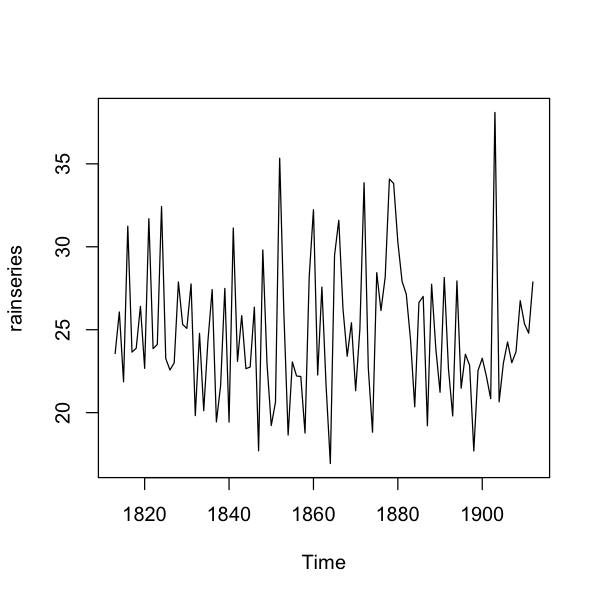

In [16]:
# The data contains total annual rainfall in inches for London, from 1813-1912
rain = scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)
rainseries = ts(rain,start=c(1813))
options(repr.plot.height = 5, repr.plot.width = 5)
plot(rainseries)

In [5]:
rainseriesforecasts = HoltWinters(rainseries, beta=FALSE, gamma=FALSE)
rainseriesforecasts

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

In [6]:
rainseriesforecasts$fitted

xhat,level
23.56,23.56
23.6205449874054,23.6205449874054
23.5780779857763,23.5780779857763
23.7628951060361,23.7628951060361
23.7601719057281,23.7601719057281
23.7630623401737,23.7630623401737
23.826910470563,23.826910470563
23.7990040443202,23.7990040443202
23.9893467737037,23.9893467737037
23.9862267343472,23.9862267343472


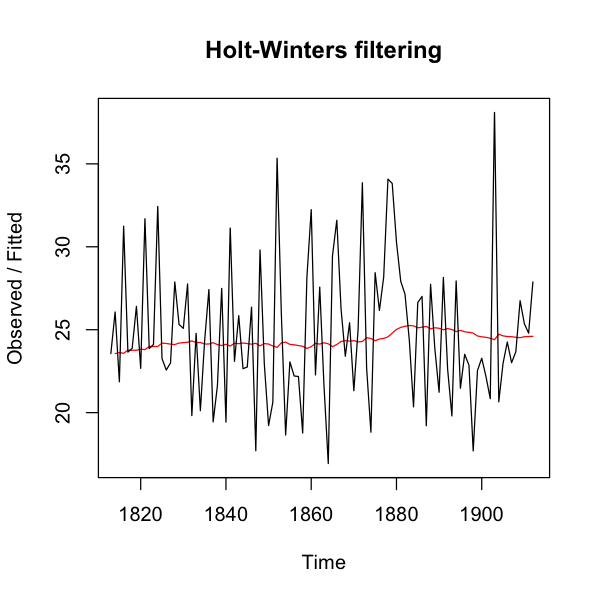

In [7]:
plot(rainseriesforecasts)

In [8]:
rainseriesforecasts$SSE

[1] 1828.855

In [9]:
HoltWinters(rainseries, beta=FALSE, gamma=FALSE, l.start=23.56)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE, l.start = 23.56)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

In [10]:
library("forecast")

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [12]:
rainseriesforecasts2 = forecast.HoltWinters(rainseriesforecasts, h=8)
rainseriesforecasts2

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1913       24.67819 19.17493 30.18145 16.26169 33.09470
1914       24.67819 19.17333 30.18305 16.25924 33.09715
1915       24.67819 19.17173 30.18465 16.25679 33.09960
1916       24.67819 19.17013 30.18625 16.25434 33.10204
1917       24.67819 19.16853 30.18785 16.25190 33.10449
1918       24.67819 19.16694 30.18945 16.24945 33.10694
1919       24.67819 19.16534 30.19105 16.24701 33.10938
1920       24.67819 19.16374 30.19265 16.24456 33.11182

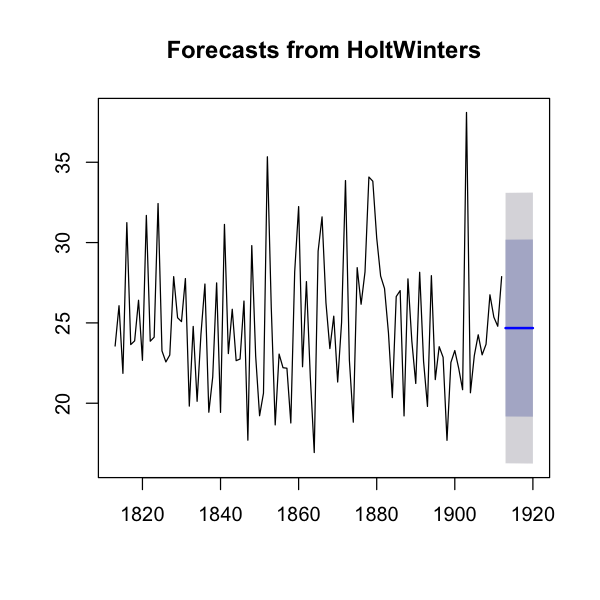

In [13]:
plot.forecast(rainseriesforecasts2)

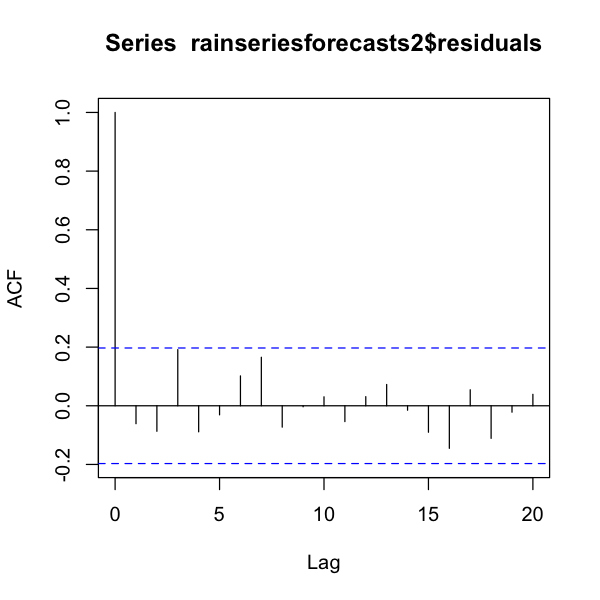

In [17]:
acf(rainseriesforecasts2$residuals, lag.max=20)

In [18]:
Box.test(rainseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  rainseriesforecasts2$residuals
X-squared = 17.401, df = 20, p-value = 0.6268


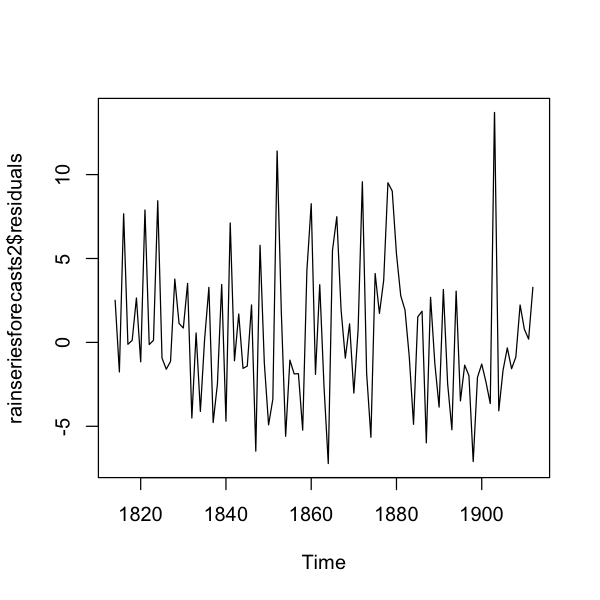

In [19]:
plot.ts(rainseriesforecasts2$residuals)

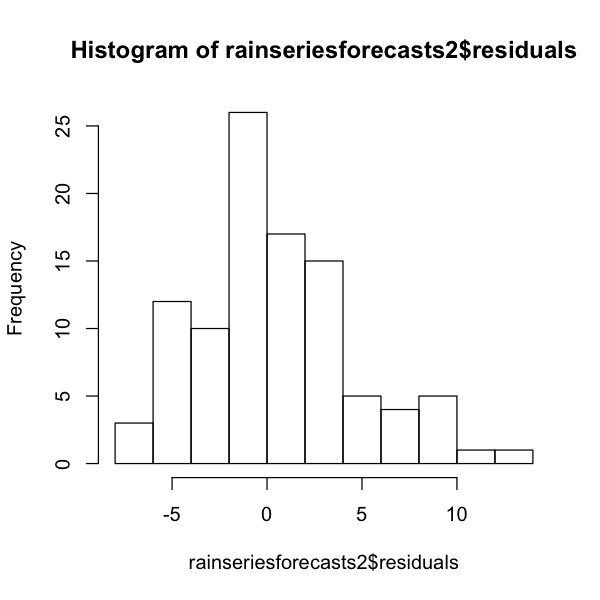

In [20]:
hist(rainseriesforecasts2$residuals)

## Holt’s Exponential Smoothing   

* If a time series is increasing or decreasing at a fixed rate,
use linear regression model  

$$ y_t = \beta_0 + \beta_1 t + \varepsilon_t \quad \text{where} \quad \varepsilon_t \sim^{iid}  N(0, \sigma^2) $$  

where the increase between time, $t - 1$, and time, $t$, is
simply the growth rate, $\beta_1$  

* What if both the mean level and the growth rate are
changing with time? We need a model to describe these
changing levels  

### Method  

* Let $l_{t-1}$ estimate the mean at time period, $t - 1$, and $b_{t-1}$
estimate the growth rate. Now our estimate of $y_t$ is
$l_{t-1} + b_{t-1}$

* Begin with an estimate of the mean and growth rate at time
point zero. Use standard linear regression on a subset of the
data.  

* Compute updated estimates using the following smoothing
equations:  

$$ l_t = \alpha y_t + (1 - \alpha)[l_{t-1} + b_{t-1}] $$
$$ b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1} $$  

where $0 < \alpha, \beta < 1$ are chosen to be arbitrary values to be
improved during the optimization process.  

* Next we want to find the best $\alpha, \beta$ by minimizing the Sum of
Squared Error (SSE)  

### Forecasting  

* We can now forecast into the future, $y_{t + h}$ . Our estimates will
become less accurate as we move further from our last
observation, $y_t$ , and the prediction intervals will get wider.  

* All point predictions will be based on $l_t , b_t$ and time $h$ :  

$$ \hat{y}_{t + h} = l_t + h b_t $$  

* The prediction interval for any time point, $h$ , in the future will
be:  

$$\hat{y}_{t + h} \pm z_{\alpha/2} \ s \ \sqrt{1 + \sum_{j = 1}^{h - 1} \alpha^2 (1 + j \beta)^2} \quad \text{where} \quad s = \sqrt{\frac{SSE}{t - 2}} $$

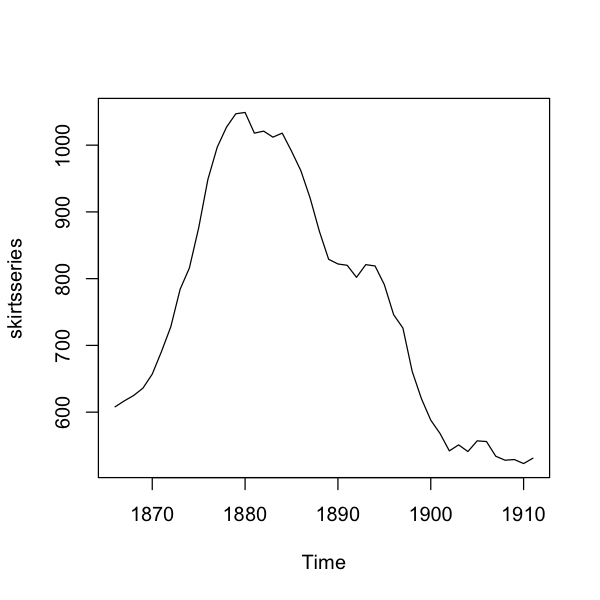

In [21]:
# The data contains the annual diameter of women’s skirts at the hem, from 1866 to 1911

skirts = scan("http://robjhyndman.com/tsdldata/roberts/skirts.dat",skip=5)
skirtsseries = ts(skirts,start=c(1866))
plot(skirtsseries)

In [22]:
skirtsseriesforecasts = HoltWinters(skirtsseries, gamma=FALSE)
skirtsseriesforecasts

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = skirtsseries, gamma = FALSE)

Smoothing parameters:
 alpha: 0.8383481
 beta : 1
 gamma: FALSE

Coefficients:
        [,1]
a 529.308585
b   5.690464

In [23]:
skirtsseriesforecasts$SSE

[1] 16954.18

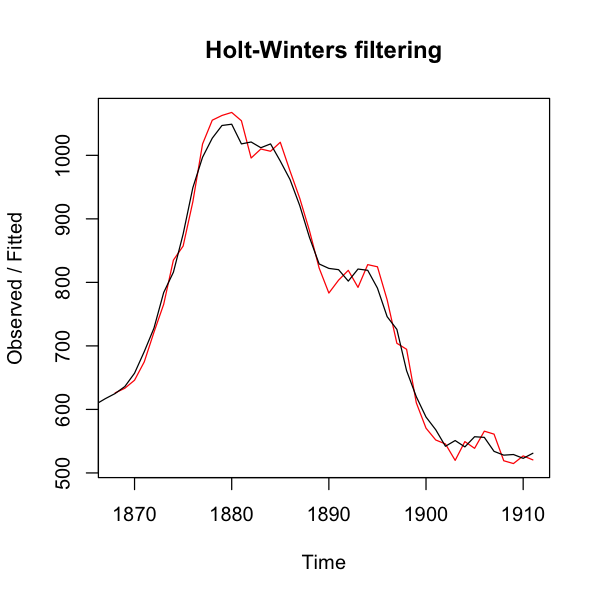

In [24]:
plot(skirtsseriesforecasts)

In [25]:
HoltWinters(skirtsseries, gamma=FALSE, l.start=608, b.start=9)

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = skirtsseries, gamma = FALSE, l.start = 608, b.start = 9)

Smoothing parameters:
 alpha: 0.8346775
 beta : 1
 gamma: FALSE

Coefficients:
        [,1]
a 529.278637
b   5.670129

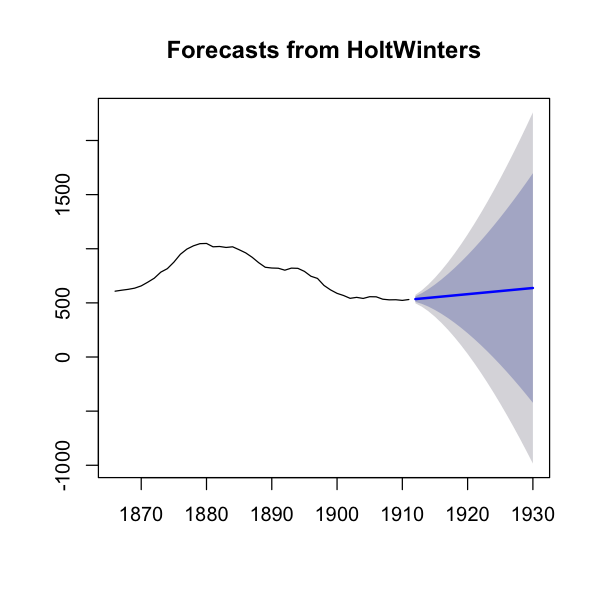

In [26]:
skirtsseriesforecasts2 = forecast.HoltWinters(skirtsseriesforecasts, h=19)
plot.forecast(skirtsseriesforecasts2)

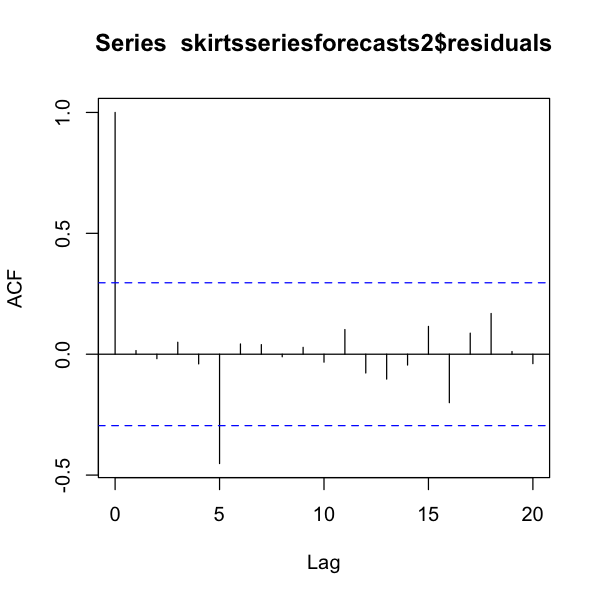

In [28]:
acf(skirtsseriesforecasts2$residuals, lag.max=20)

In [29]:
Box.test(skirtsseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  skirtsseriesforecasts2$residuals
X-squared = 19.731, df = 20, p-value = 0.4749


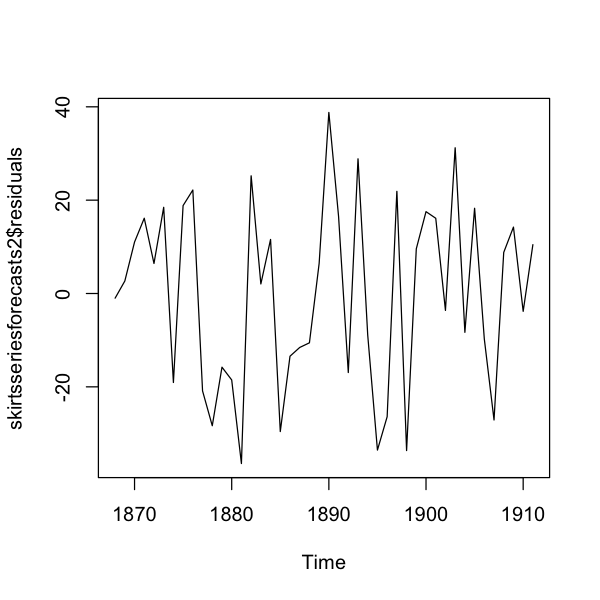

In [30]:
plot(skirtsseriesforecasts2$residuals)

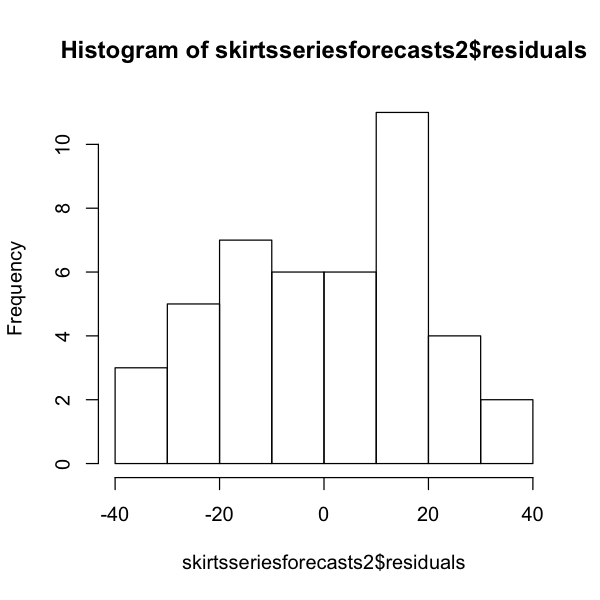

In [31]:
hist(skirtsseriesforecasts2$residuals)

## Holt-Winters Exponential Smoothing  

* If we had a fixed trend and fixed seasonal factor, our
previous model was:  

$$ y_t = T_t + S_t + \varepsilon_t \quad \text{where} \quad \varepsilon_t \sim^{iid}  N(0, \sigma^2) $$  

* If linear trend is changing with time and has constant
seasonal variation we can use the additive Holt-Winter's
method to extend Holt's method

### Method  

* Let sn_{t - L} denote the most recent estimate of the seasonal
factor for the season in time $t$ where $L$ is the number of
seasons.  

* Begin with Holt's trend corrected method on a subset of the
data  

* Our seasonal baseline factors are found as follows:  
    * Detrend the data by computing: $y_t - \hat{y}_t$  
    * Compute the baseline seasonal factors by averaging the
detrended values over the years for each season  

* Compute updated estimates using the following smoothing
equations: 

$$ l_t = \alpha(y_t - sn_{t-L}) + (1 - \alpha)[l_{t-1} + b_{t-1}] $$  


$$ b_t = \beta(l_t - l_{t-1}) + (1 - \beta)b_{t-1} $$  


$$ sn_t = \gamma(y_t - l_t) + (1 - \gamma)sn_{t-L} $$  

### Forecasting   

* Point predictions:   

$$y_{t+h} = l_t + b_t + sn_{t+h-L} $$

In [33]:
# The data contains monthly sales for a souvenir shop at a beach 
# resort town in Queensland, Australia, for January 1987-December 1993
souvenir = scan("http://robjhyndman.com/tsdldata/data/fancy.dat")
souvenirtimeseries = ts(souvenir, frequency=12, start=c(1987,1))
souvenirtimeseries

           Jan       Feb       Mar       Apr       May       Jun       Jul
1987   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
1988   2499.81   5198.24   7225.14   4806.03   5900.88   4951.34   6179.12
1989   4717.02   5702.63   9957.58   5304.78   6492.43   6630.80   7349.62
1990   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75   8121.22
1991   4826.64   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55
1992   7615.03   9849.69  14558.40  11587.33   9332.56  13082.09  16732.78
1993  10243.24  11266.88  21826.84  17357.33  15997.79  18601.53  26155.15
           Aug       Sep       Oct       Nov       Dec
1987   3566.34   5021.82   6423.48   7600.60  19756.21
1988   4752.15   5496.43   5835.10  12600.08  28541.72
1989   8176.62   8573.17   9690.50  15151.84  34061.01
1990   7979.25   8093.06   8476.70  17914.66  30114.41
1991  12552.22  11637.39  13606.89  21822.11  45060.69
1992  19888.61  23933.38  25391.35  36024.80  80721.71
1993  28586.52 

In [34]:
logsouvenirtimeseries = log(souvenirtimeseries)
souvenirtimeseriesforecasts = HoltWinters(logsouvenirtimeseries)
souvenirtimeseriesforecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = logsouvenirtimeseries)

Smoothing parameters:
 alpha: 0.413418
 beta : 0
 gamma: 0.9561275

Coefficients:
           [,1]
a   10.37661961
b    0.02996319
s1  -0.80952063
s2  -0.60576477
s3   0.01103238
s4  -0.24160551
s5  -0.35933517
s6  -0.18076683
s7   0.07788605
s8   0.10147055
s9   0.09649353
s10  0.05197826
s11  0.41793637
s12  1.18088423

In [35]:
souvenirtimeseriesforecasts$SSE

[1] 2.011491

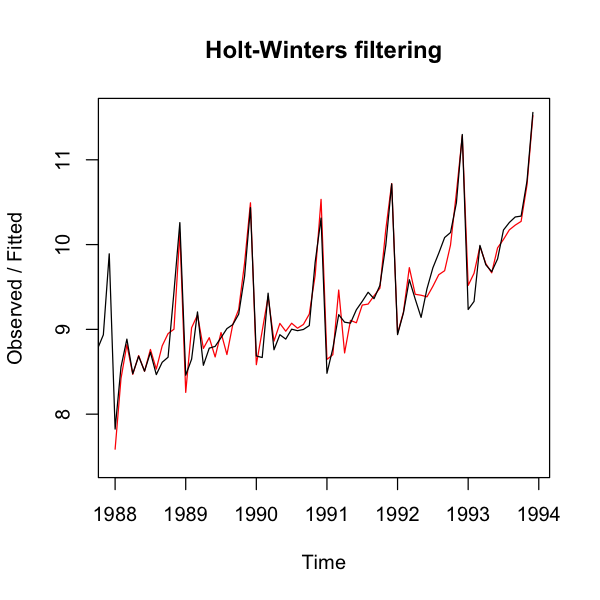

In [36]:
plot(souvenirtimeseriesforecasts)

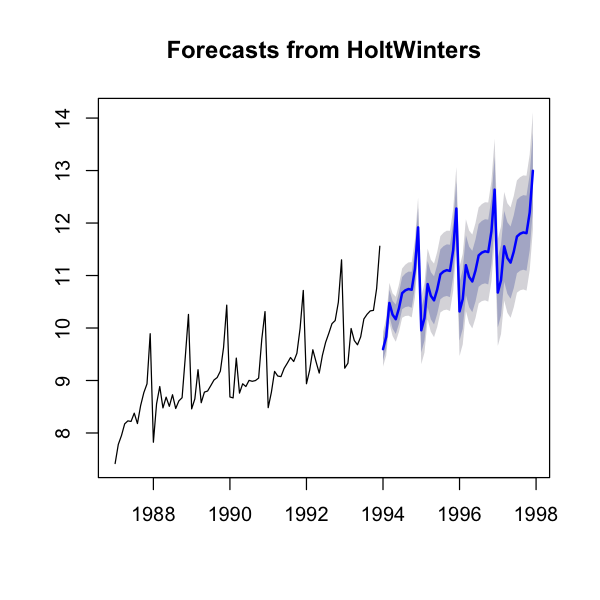

In [37]:
souvenirtimeseriesforecasts2 = forecast.HoltWinters(souvenirtimeseriesforecasts, h=48)
plot.forecast(souvenirtimeseriesforecasts2)

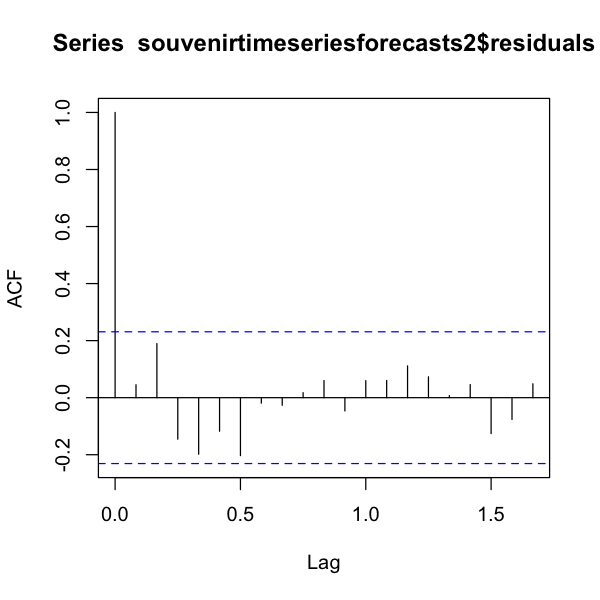

In [38]:
acf(souvenirtimeseriesforecasts2$residuals, lag.max=20)

In [39]:
Box.test(souvenirtimeseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  souvenirtimeseriesforecasts2$residuals
X-squared = 17.53, df = 20, p-value = 0.6183


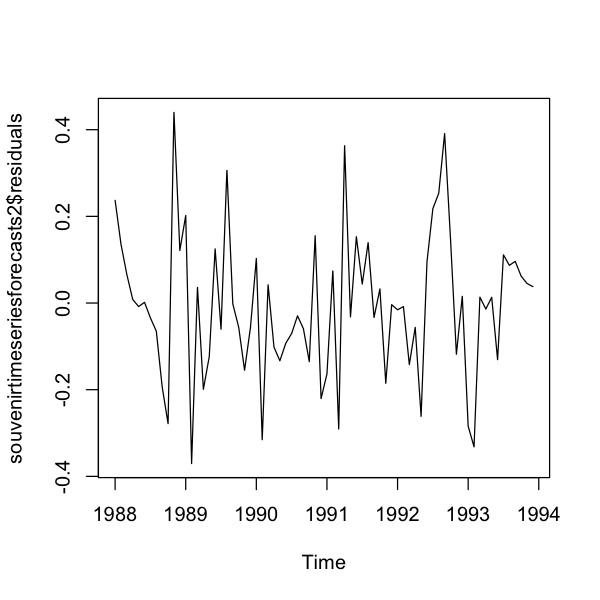

In [40]:
plot(souvenirtimeseriesforecasts2$residuals)            

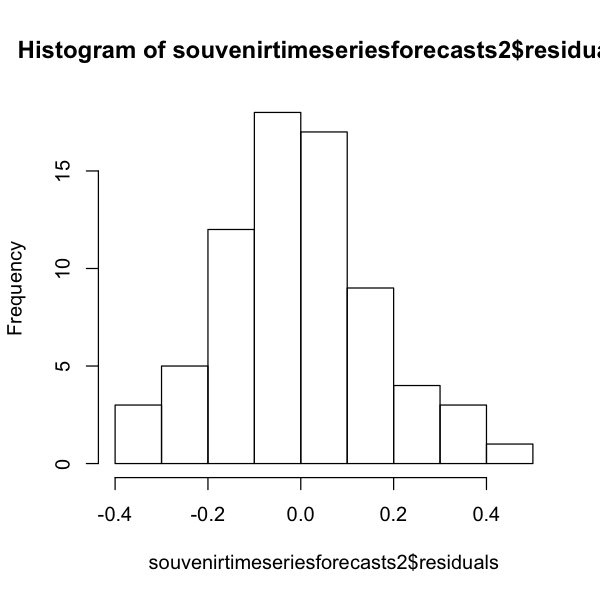

In [41]:
hist(souvenirtimeseriesforecasts2$residuals)